# Multippel lineær regresjon med leieindeks-data (ISTX1003)

Denne notatboken ble brukt på Zoom-forelsening nr 2, 28.10.2020, se også forelesningsnotater fra timen på https://www.math.ntnu.no/emner/IST100x/ISTx1003/Zoom2InClass20201028.pdf

Spørsmål: hva er sammenhengen mellom leiepris for leiligheter i München og mange ulike egenskaper til  leiligheten? Kan vi lage en prediksjonsmodell?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)# fordi en av plottefunksjonene må oppdateres av utvikler og kommer per i dag med lang FutureWarning som vi ikke vil se på
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

# Steg 1: Bli kjent med data

Hva ser vi etter i plott av data?

In [2]:
filurl="http://www.uni-goettingen.de/de/document/download/64c29c1b1fccb142cfa8f29a942a9e05.raw/rent99.raw"
df=pd.read_csv(filurl," ") # bruker mellomrom mellom kolonner
df=df.astype({'bath':'category','kitchen':'category','cheating':'category','location':'category'})
print(df.shape)
df.sort_values(by=['area'],inplace=True)  # Sorterer datasettet mhp area (for plotting)
#df.head() # Merk at den originale indekseringen av rader bevares
print(df.describe())
df.corr()

(3082, 9)
              rent      rentsqm         area        yearc     district
count  3082.000000  3082.000000  3082.000000  3082.000000  3082.000000
mean    459.437179     7.111259    67.374757  1956.306295  1169.715769
std     195.656638     2.436008    23.720446    22.308868   677.849333
min      40.512821     0.415800    20.000000  1918.000000   113.000000
25%     322.025635     5.260958    51.000000  1939.000000   561.000000
50%     426.974350     6.980241    65.000000  1959.000000  1025.000000
75%     559.358994     8.840824    81.000000  1972.000000  1714.000000
max    1843.384644    17.721611   160.000000  1997.000000  2529.000000


,rent,rentsqm,area,yearc,district
rent,1.000000,0.502515,0.584531,0.134148,-0.020700
rentsqm,0.502515,1.000000,-0.340731,0.388857,0.045991
area,0.584531,-0.340731,1.000000,-0.230621,-0.093812
yearc,0.134148,0.388857,-0.230621,1.000000,0.327685
district,-0.020700,0.045991,-0.093812,0.327685,1.000000


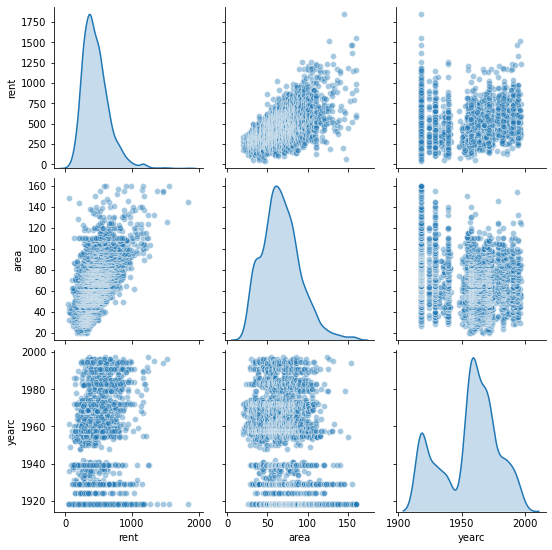

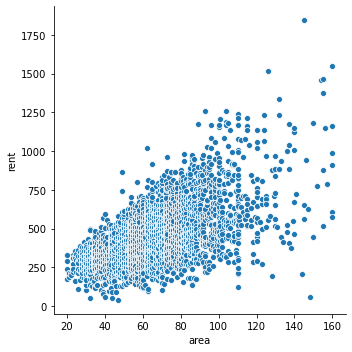

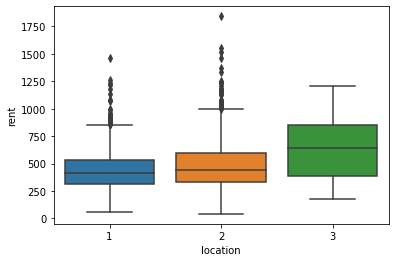

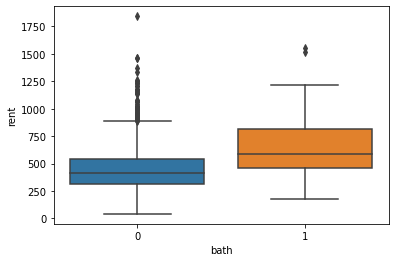

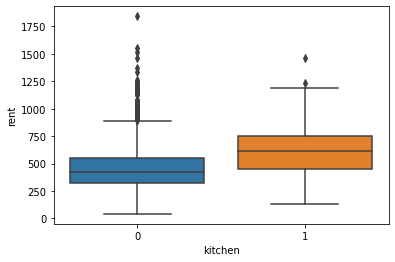

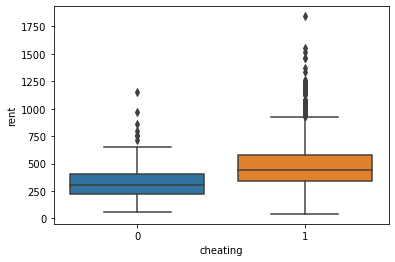

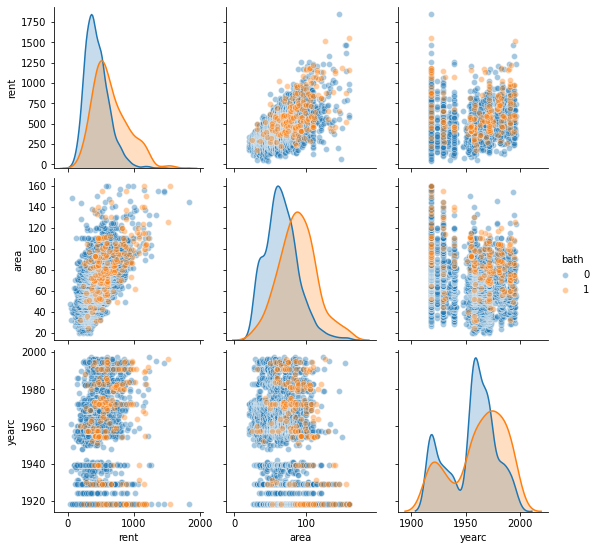

In [3]:
 # Kryssplott 
# På diagonalen er glattede histogrammer (tetthetsplott) 
sns.pairplot(df, vars = ['rent','area', 'yearc'],
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

# Kryssplott alene
sns.relplot(x='area', y='rent',data = df)
plt.show()

# Boksplott av de 4 kategoriske variablene

ax = sns.boxplot(x="location", y="rent", data=df)
plt.show()
ax = sns.boxplot(x="bath", y="rent", data=df)
plt.show()
ax = sns.boxplot(x="kitchen", y="rent", data=df)
plt.show()
ax = sns.boxplot(x="cheating", y="rent", data=df)
plt.show()

sns.pairplot(df, vars = ['rent','area', 'yearc'],
             hue = 'bath', 
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

## litt uttesting av artige plott bare under her
#ax = sns.boxplot(x="location", y="rent", hue="bath",
#                 data=df, palette="Set3")
#plt.show()
#ax = sns.boxplot(x="location", y="rent", hue="kitchen",
#                 data=df, palette="Set3")
#plt.show()
#ax = sns.boxplot(x="location", y="rent", hue="cheating",
#                 data=df, palette="Set3")
#plt.show()

#ax = sns.swarmplot(x="bath", y="rent", data=df)
#plt.show()

#ax = sns.swarmplot(x="location", y="rent", data=df)
#plt.show()

# Steg 2: Spesifiser en matematisk modell 

Hvordan bruker vi en såkalt modellformel for å spesifisere regresjonsmodellen?

In [4]:
formel='rent~area+bath+kitchen+cheating+location'

# Steg 3: Initialiser og tilpass modellen

In [5]:
modell = smf.ols(formel,data=df)
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede modellen 

* Hva er ligningen for den estimerte regresjonsmodellen? Hva betyr de ulike elementene?
* Hvordan kan vi tolke den estimerte verdien til skjæringspunktet $\hat{\beta}_0$, og til stigningstallet $\hat{\beta}_1$?
* Hva er den beste måten å kommunisere usikkerhet i stigningstallet (og skjæringspunktet)?
* Hva betyr det at en forklaringsvariabel er signifikant?

In [6]:
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     420.0
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:59:56   Log-Likelihood:                -19712.
No. Observations:                3082   AIC:                         3.944e+04
Df Residuals:                    3075   BIC:                         3.948e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -21.9733     11.655     -1.885

# Steg 5: Evaluer om modellen passer til dataene

* Hva er modellantagelsene våre?
* Hvordan sjekker vi at modellantagelsene er oppfylt med plott?
* Hvordan evaluerer vi godheten til modellen?


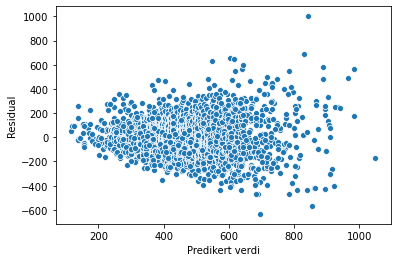

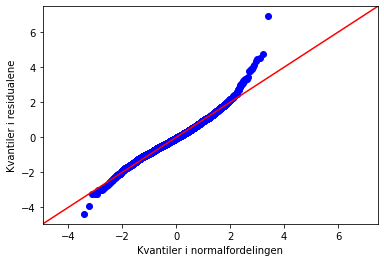

In [7]:
sns.scatterplot(resultat.fittedvalues, resultat.resid)
plt.ylabel("Residual")
plt.xlabel("Predikert verdi")
plt.show()

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.show()